In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from nltk import word_tokenize, pos_tag
from wordcloud import WordCloud
import os

In [2]:
data_dir="C:\\Users\\skhan\\Learning\\IBPA\\Chapter 7\\Case Study"
os.chdir(data_dir)

In [8]:
Amazon_Reviews=pd.read_csv("Consumer_Reviews_of_Amazon_Products_May19.csv")
Amazon_Reviews.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews_date', 'reviews_dateSeen',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_id',
       'reviews_numHelpful', 'reviews_rating', 'reviews_sourceURLs',
       'reviews_text', 'reviews_title', 'reviews_username', 'sourceURLs'],
      dtype='object')

In [9]:
Amazon_Reviews.head(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [9]:
''''Question 1
What is the shape of the dataframe “Amazon_Reviews”?'''
Amazon_Reviews.shape

(28332, 24)

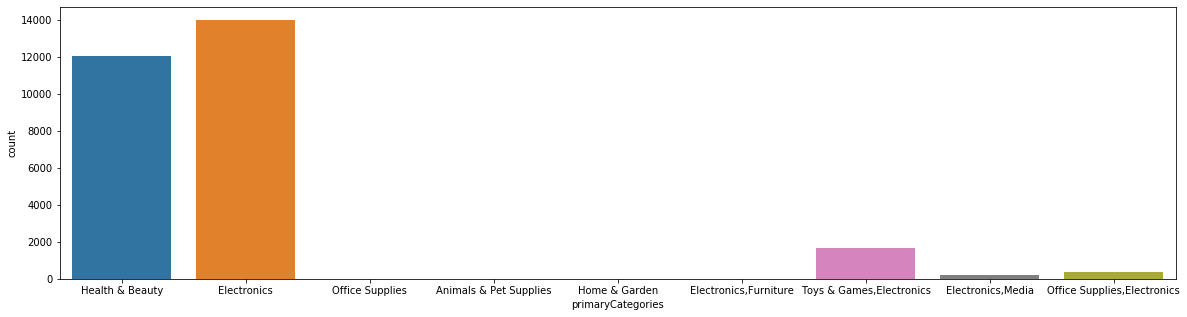

In [10]:
''''Question 2
Draw a countplot chart using seaborn on the “primaryCategories.” Which “primaryCategories” 
has the highest product reviews? Please also add the chart to the ppt'''
plt.figure(figsize=(20,5))
sns.countplot( x='primaryCategories', data = Amazon_Reviews)

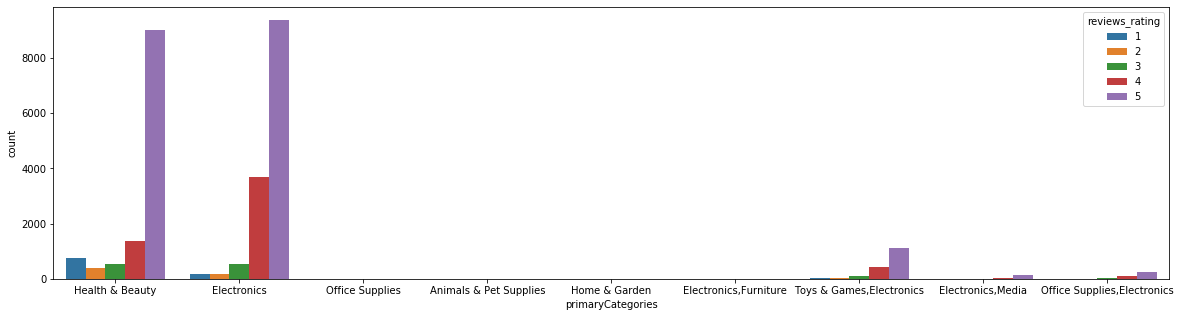

In [11]:
'''' Question 3
Use seaborn to plot a chart showing 'reviews_rating' for each “primaryCategories” in a 
bar chart format. Which “primaryCategories” has the highest 'reviews_rating' of 1? Please also add the chart to the ppt.'''
plt.figure(figsize=(20,5))
sns.countplot(x='primaryCategories', hue ='reviews_rating', data=Amazon_Reviews)

In [12]:
'''' Question 4
Negative feedback are feedback with 'reviews_rating' of 1. We converted the negative “reviews_text” as
a text string. We used part of speech tagging to identify the POS for the first 50 characters. 
The last word was “seems”. What POS was assigned to it?'''
negative_rating = Amazon_Reviews[ Amazon_Reviews.reviews_rating == 1]
negative_rating.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
16,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,I don't know if I would buy thus brand again s...,... know if I would buy thus brand again seems...,ByLaura,"https://www.barcodable.com/upc/841710106442,ht..."
24,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,These do not last long at all very cheap batte...,... not last long at all very cheap batteries ...,ByDiane ault,"https://www.barcodable.com/upc/841710106442,ht..."


In [13]:
neg_words = []
for t in negative_rating.reviews_text:  # Go to the "reviews_text" column of "negative_rating" dataframe
    neg_words.append(t)
neg_words[:4]

["I don't know if I would buy thus brand again seems like they don't last as long as Duracell",
 'These do not last long at all very cheap batteries no happy',
 "These batteries are horrible. We depend on AA batteries for many wireless microphone and have found that brand-name batteries last about a month per our usage. We switched to Amazon basics to try it out when a subscription for our preferred brand was no longer available and have found that, under the same usage, these batteries last about a week. That's a 1/4 capacity.",
 'First time I bought these they worked well and lasted almost as long as the name brands. Not the same this time around, almost no charge - 4-6 hours of run time - Junk batteries.']

In [14]:
neg_text = pd.Series(neg_words).str.cat(sep = ' ')

In [15]:
neg_text[:50]

"I don't know if I would buy thus brand again seems"

In [16]:
print(pos_tag(word_tokenize(neg_text[:50])))

[('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('know', 'VB'), ('if', 'IN'), ('I', 'PRP'), ('would', 'MD'), ('buy', 'VB'), ('thus', 'RB'), ('brand', 'NN'), ('again', 'RB'), ('seems', 'VBZ')]


In [18]:
'''Question 5
Negative feedback are feedback with 'reviews_rating' of 1. Plot a Word Cloud and please also add the chart to the ppt. 
What is the most frequently occurring word in the negative feedback word cloud of “reviews_text”?
'''
wordcloud_neg = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(neg_text)

(-0.5, 1599.5, 799.5, -0.5)

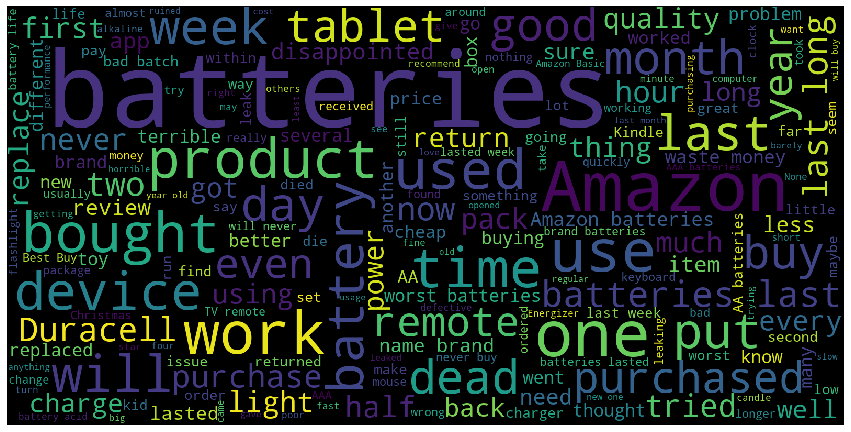

In [19]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_neg)
plt.axis("off")

In [20]:
'''''Question 6
Positive feedback are feedback with 'reviews_rating' of 5. Plot a Word Cloud and please also add the chart to the ppt. 
What word/phrase does NOT occur in the most frequently occurring word in the positive feedback word cloud of “reviews_text”?'''
positive_rating = Amazon_Reviews[ Amazon_Reviews.reviews_rating == 5]
positive_rating.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."


In [21]:
pos_words = []
for t in positive_rating.reviews_text:  # Go to the "reviews_text" column of "positive_rating.reviews" dataframe
    pos_words.append(t)
pos_words[:4]

['Well they are not Duracell but for the price i am happy.',
 'Seem to work as well as name brand batteries at a much better price',
 'These batteries are very long lasting the price is great.',
 "Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand name batteries and the Amazon Basic brand. Just a lot easier to purchase and have arrive at the house and have on hand. Will buy again."]

In [22]:
pos_text = pd.Series(pos_words).str.cat(sep = ' ')

In [31]:
wordcloud_pos = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(pos_text)

(-0.5, 1599.5, 799.5, -0.5)

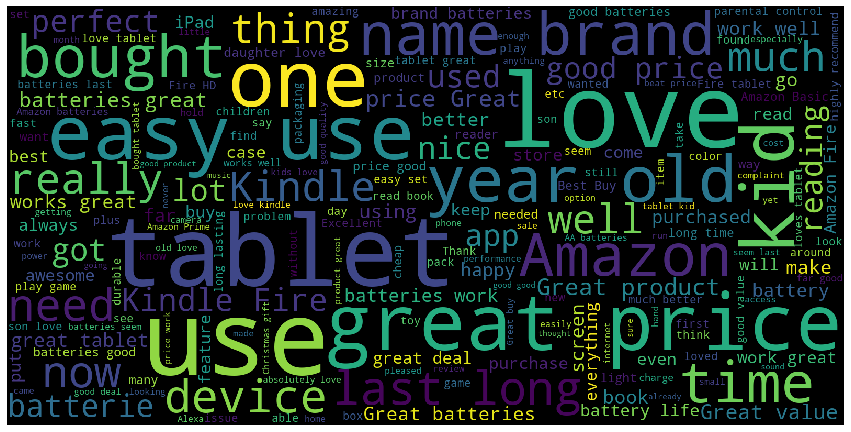

In [32]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_pos)
plt.axis("off")

In [33]:
'''''Question 7
Neutral feedback are feedback with 'reviews_rating' of 3. Plot a Word Cloud and please also add the chart to the ppt.
Which of the following words has the lowest frequency of occurrence in the neutral feedback word cloud of “reviews_text”?'''
neutral_rating = Amazon_Reviews[ Amazon_Reviews.reviews_rating == 3]
neutral_rating.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
8,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,These do not hold the amount of high power jui...,... do not hold the amount of high power juice...,ByK.R.,"https://www.barcodable.com/upc/841710106442,ht..."


In [34]:
neu_words = []
for t in neutral_rating.reviews_text:  # Go to the "reviews_text" column of "neutral_rating" dataframe
    neu_words.append(t)
neu_words[:4]

['I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.',
 'These do not hold the amount of high power juice like energizer or duracell, but they are half the price.',
 'When I first started getting the Amazon basic batteries I really liked them. With recent purchases, they do not seem to last like they had, or maybe a mixed-bag (inconsistent with some lasting better than others). I have not done any tests, but feel some other brands may last longer. However, the price is hard to beat.',
 "Bought these batteries for my Christmas gifts the month of (december) only lasted like 2months toys now need replacement batteries . I also used some for my doorbell and just now needs replacement batteries. Tv Remote control is still working but these batteries don't last very long..."]

In [35]:
neu_text = pd.Series(neu_words).str.cat(sep = ' ')

In [36]:
wordcloud_neu = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(neu_text)

(-0.5, 1599.5, 799.5, -0.5)

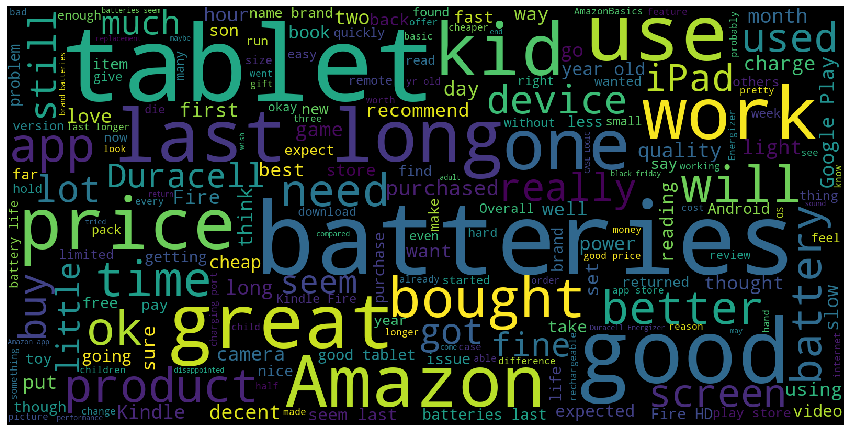

In [37]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_neu)
plt.axis("off")

In [44]:
'''''Question 8
We made a dataframe which had positive phrases 'reviews_rating' of 5 and primaryCategories as "Electronics." 
We made a wordcloud on the “reviews_text”. Which word is NOT included as a very frequently occurring word:'''
#Using positive_rating dataframe to future drill down to Electronic primaryCategories
positive_rating_Electronics = positive_rating[ positive_rating.primaryCategories == 'Electronics']
positive_rating_Electronics.head(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...
8344,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...
8345,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...
8347,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Amazon Echo ‚Äì White,"B01E6AO69U,B00L9EPT8O",Amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Electronics,https://i.ebayimg.com/images/g/NWEAAOSwDehbdx6...,"amazonechowhite/b00l9ept8o,amazonechowhite/b01...",...,True,NaN,NaN,NaN,5,https://www.newegg.com/Product/Product.aspx?It...,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous,https://www.newegg.com/Product/Product.aspx?It...
8348,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Amazon Echo ‚Äì White,"B01E6AO69U,B00L9EPT8O",Amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Electronics,https://i.ebayimg.com/images/g/NWEAAOSwDehbdx6...,"amazonechowhite/b00l9ept8o,amazonechowhite/b01...",...,True,NaN,NaN,NaN,5,https://www.newegg.com/Product/Product.aspx?It...,"Pros: Got it for under 50, much impressive sou...",Much better sound sound than 2nd generation,Anonymous,https://www.newegg.com/Product/Product.aspx?It...


In [40]:
pos_electronics_words = []
for t in positive_rating_Electronics.reviews_text:  # Go to the "reviews_text" column of "positive_rating_Electronics" dataframe
    pos_electronics_words.append(t)
pos_electronics_words[:4]

['Great case to keep everything in its place! My husband love it!!!! Holds a lot of cds!',
 'After discarding and getting rid of broken cd cases, broken cds, and selecting those ones we really like, this binder turned up to be an excellent option to store our favourite cds and dvds and keep them in a small space at our living room, giving us the choice to donate or get rid of those cds towers that took a lot of room, despite looking nice. And because you can turn the pages, you can spot the cd you want to play without the hassle of taking it from a case that is falling apart. After storing them cds, all the cases and printed covers went straight to the recycling centre. We have a small version to put those cds my husband would like to listen to whenever he must drive away for work.',
 'A few dollars more, but I am boycotting amazon',
 'Pros: Standard Echo. Cons: Older generation Echo. Other Thoughts: Arrived on time and was new in box.']

In [41]:
pos_electronics_text = pd.Series(pos_electronics_words).str.cat(sep = ' ')

In [42]:
wordcloud_pos_electronics = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(pos_electronics_text)

(-0.5, 1599.5, 799.5, -0.5)

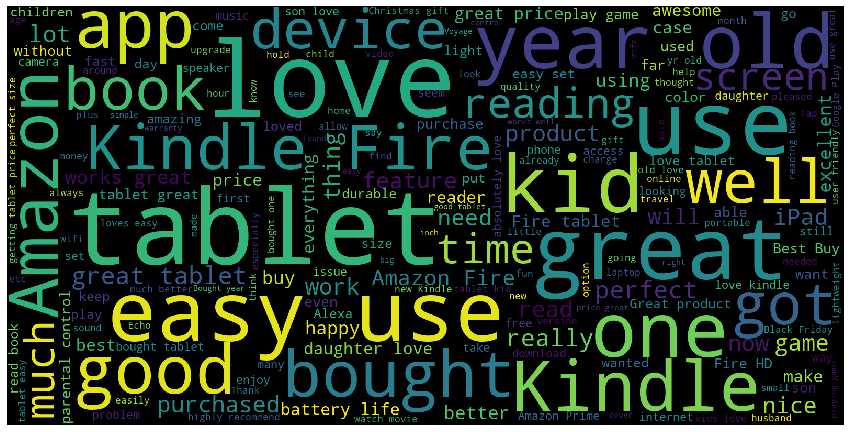

In [43]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_pos_electronics)
plt.axis("off")

In [45]:
''''Question 9
We made a dataframe which had positive phrases 'reviews_rating' of 5 and primaryCategories as "Electronics." 
We converted the negative “reviews_title” as a text string. We used part of speech tagging to identify the POS 
for the first 50 characters. The text contained a word “much”. What POS was assigned to it?'''
pos_electronics_title = []
for t in positive_rating_Electronics.reviews_title:  # Go to the "reviews_title" column of "positive_rating_Electronics" dataframe
    pos_electronics_title.append(t)
pos_electronics_title[:4]

['Excellent product',
 'It was a much needed storage',
 'it was worth it',
 'Arrived as described.']

In [46]:
pos_electronics_text = pd.Series(pos_electronics_title).str.cat(sep = ' ')

In [48]:
pos_electronics_text[:50]

'Excellent product It was a much needed storage it '

In [49]:
print(pos_tag(word_tokenize(pos_electronics_text[:50])))

[('Excellent', 'JJ'), ('product', 'NN'), ('It', 'PRP'), ('was', 'VBD'), ('a', 'DT'), ('much', 'RB'), ('needed', 'VBN'), ('storage', 'NN'), ('it', 'PRP')]
